In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize

raw_data = pd.read_csv('../data/2021-SxS-Data-and-Data-Info/partial_cleaned_2021.csv')
raw_data = raw_data.drop(columns='Unnamed: 0')

In [2]:
#Military Only (current or previous)
# Down the line would be nice to see how military pop compares to general pop 
mil_only_df = raw_data[(raw_data['mil_stat'] == 'current') | (raw_data['mil_stat'] == 'previous')]

In [3]:
# I wanted to trim down the features to see if there was anything interesting about these
# These may be predictors of something else or of eachother
combined_df = raw_data[['state','math_conf_lvl','fin_sat_lvl','fin_conf_lvl', 'ed_lvl', 'caregiver_ed_lvl', 'hh_ann_inc']]
# Replace all 99 &98 answers with none in columns & drop them since it skews mean
combined_df.loc[combined_df['math_conf_lvl'] == 99, 'math_conf_lvl'] = None
combined_df.loc[combined_df['fin_sat_lvl'] == 99, 'fin_sat_lvl'] = None
combined_df.loc[combined_df['fin_conf_lvl'] == 99, 'fin_conf_lvl'] = None
combined_df.loc[combined_df['math_conf_lvl'] == 98, 'math_conf_lvl'] = None
combined_df.loc[combined_df['fin_sat_lvl'] == 98, 'fin_sat_lvl'] = None
combined_df.loc[combined_df['fin_conf_lvl'] == 98, 'fin_conf_lvl'] = None
combined_df.loc[combined_df['ed_lvl'] == 'declined', 'ed_lvl'] = None
combined_df = combined_df.dropna()


## Pie Charts
Gender, Age, Ethnicity

Text(0.5, 1.0, 'Total Age Breakdown')

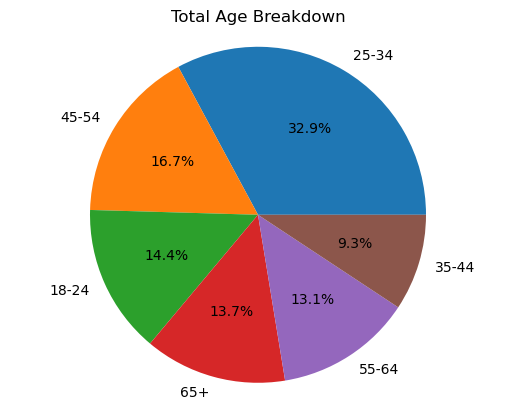

In [4]:
#Age Break Down
#ToDO: Make Pretty
age_labels = mil_only_df['age_group'].unique()
mil_age_counts = mil_only_df['age_group'].value_counts()
total_age_count =raw_data['age_group'].value_counts()

plt.pie(mil_age_counts, labels=age_labels,
            autopct='%1.1f%%' )
plt.axis('equal')
plt.title('Total Age Breakdown')

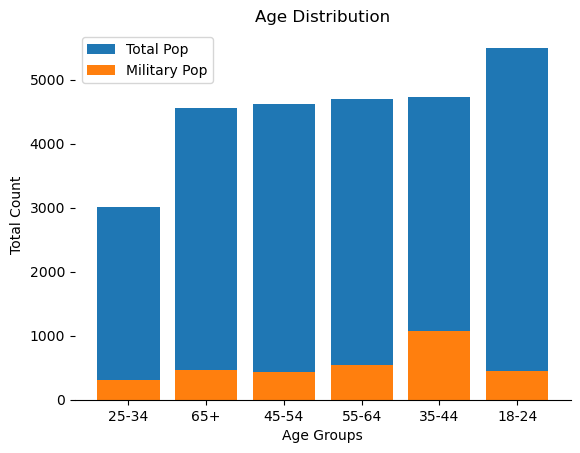

In [5]:
fig, ax = plt.subplots()
#Total Population Age Distro
bars1 = plt.bar(raw_data['age_group'].unique(), raw_data['age_group'].value_counts().sort_values(), label='Total Pop' )
#military only (current or previous)
ax.bar(mil_only_df['age_group'].unique(), mil_only_df['age_group'].value_counts().sort_values(), label='Military Pop')

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")


#Labels
ax.set_title('Age Distribution')
ax.set_xlabel('Age Groups')
ax.set_ylabel('Total Count')
plt.legend()


## Histograms

In [6]:
#Data needs to be rarranged for these graphs
h_conf = raw_data[['state','fin_conf_lvl']].groupby('state').mean()
h_sat = raw_data[['state', 'fin_sat_lvl']].groupby('state').mean()
h_math = raw_data[['state', 'math_conf_lvl']].groupby('state').mean()


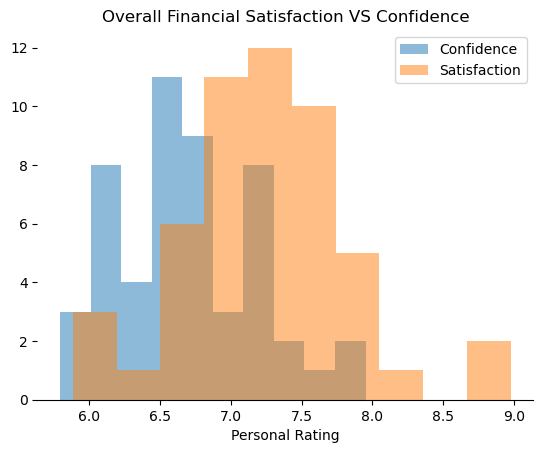

In [7]:
fig, ax = plt.subplots()
plt.hist(h_conf , label='Confidence', alpha=0.5)
plt.hist(h_sat , label='Satisfaction', alpha=0.5)

plt.legend(loc='upper right')
plt.title('Overall Financial Satisfaction VS Confidence')
plt.xlabel('Personal Rating')

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

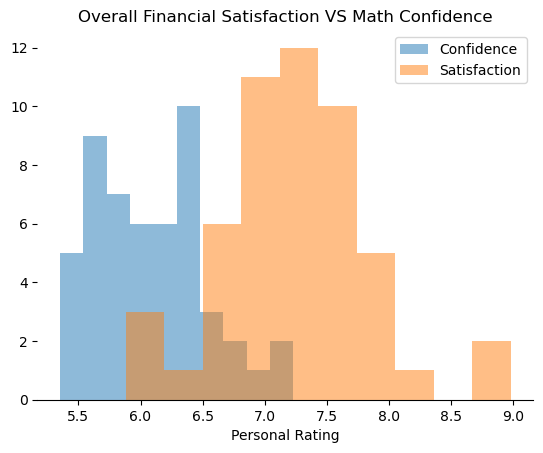

In [8]:
fig, ax = plt.subplots()
plt.hist(h_math, label='Confidence', alpha=0.5)
plt.hist(h_sat, label='Satisfaction', alpha=0.5)

plt.legend(loc='upper right')
plt.title('Overall Financial Satisfaction VS Math Confidence')
plt.xlabel('Personal Rating')

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

## Hexbin Maps

In [9]:
#To use for Hexbins
state_math_avg =combined_df[['state','math_conf_lvl']].groupby('state').mean().reset_index()
state_math_avg=state_math_avg.sort_values(by='state')

state_sat_avg =combined_df[['state','fin_sat_lvl']].groupby('state').mean().reset_index()
state_sat_avg=state_sat_avg.sort_values(by='state')

fin_conf_avg = combined_df[['state','fin_conf_lvl']].groupby('state').mean().reset_index()
fin_conf_avg = fin_conf_avg.sort_values(by='state')


In [10]:
# Load file
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)
# Add a new column to the geo dataframe that will be used for joining:
geoData['state'] = geoData['google_name'].str.replace('(United States)','')
# Sort by column: 'state' (ascending)
geoData = geoData.sort_values(['state']).reset_index()
# Drop column: 'bees'
geoData = geoData.drop(columns=['bees', 'index'])
#Create Columns from subsets
geoData['fin_sat_avg'] = state_sat_avg['fin_sat_lvl']
geoData['math_conf_avg'] = state_math_avg['math_conf_lvl']
geoData['fin_conf_avg'] = fin_conf_avg['fin_conf_lvl']

/opt/anaconda3/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/opt/anaconda3/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


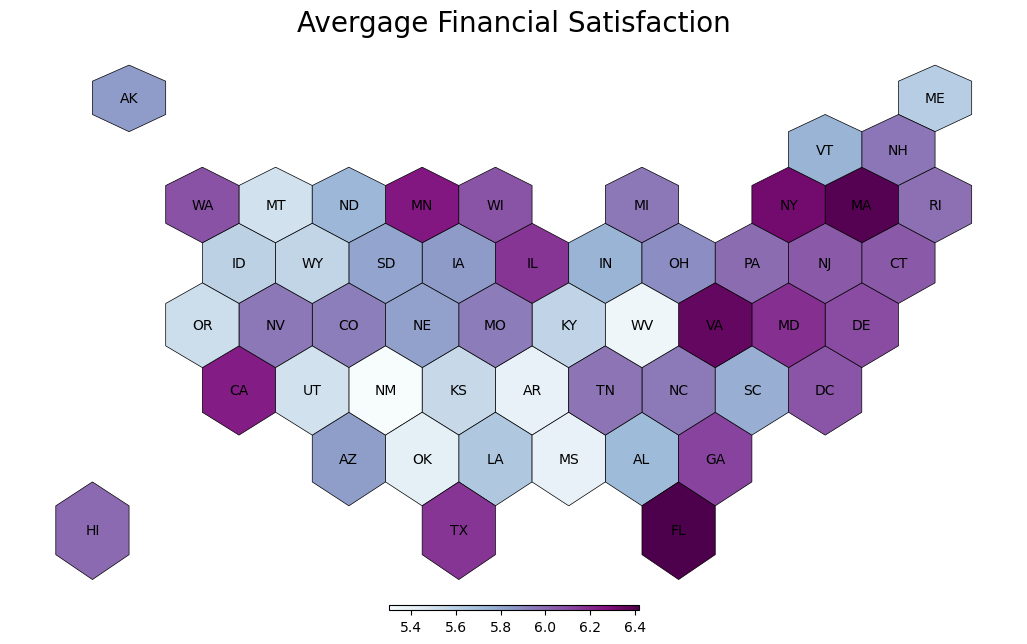

In [11]:
# Initialize the figure
fig, ax = plt.subplots(1, figsize=(13, 13))


# Draw a map with matplotlib 
geoData.plot(
    ax=ax, 
    column='fin_sat_avg',
    cmap="BuPu",
    edgecolor='black', 
    linewidth=.5,
    legend=False
)
# add a "centroid" column with the centroid position of each state
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# for each state, annotate with the state name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    ax.annotate(
        text=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color= 'black'
    )
# Remove axis
ax.axis('off')

plt.title('Avergage Financial Satisfaction' , size= 20)

# Add a color bar
norm = Normalize(vmin=geoData['fin_sat_avg'].min(), vmax=geoData['fin_sat_avg'].max())
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=norm)
sm.set_array([geoData['fin_sat_avg']]) 
fig.colorbar(sm, orientation="horizontal",  aspect=50,fraction=0.005, pad=0, ax = ax )

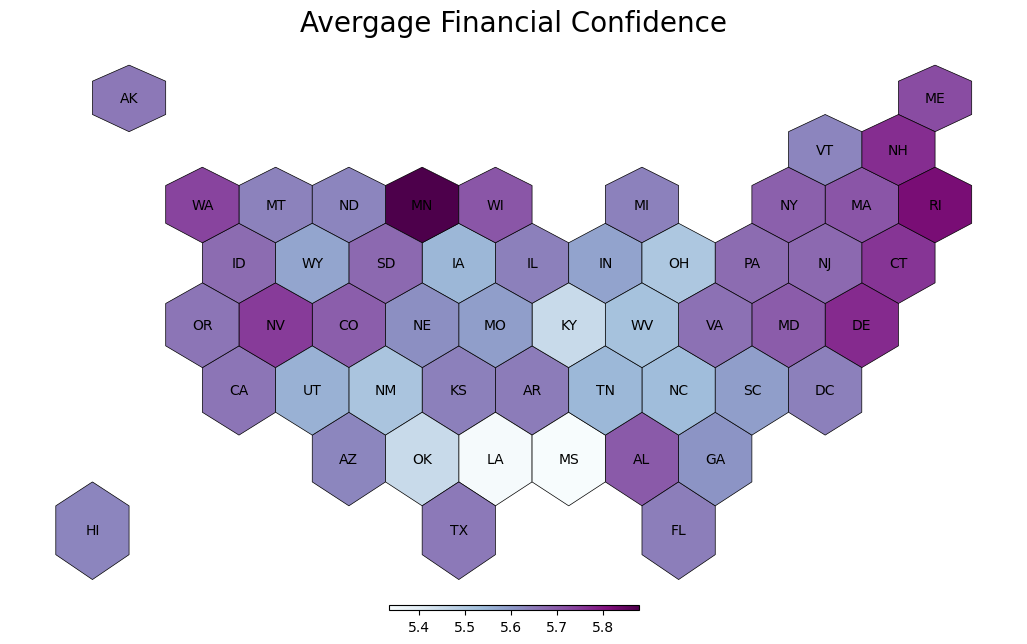

In [12]:
# Initialize the figure
fig, ax = plt.subplots(1, figsize=(13, 13))


# Draw a map with matplotlib 
geoData.plot(
    ax=ax, 
    column='fin_conf_avg',
    cmap="BuPu",
    edgecolor='black', 
    linewidth=.5,
    legend=False
)
# add a "centroid" column with the centroid position of each state
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# for each state, annotate with the state name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    ax.annotate(
        text=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color= 'black'
    )
# Remove axis
ax.axis('off')

plt.title('Avergage Financial Confidence' , size= 20)

# Add a color bar
norm = Normalize(vmin=geoData['fin_conf_avg'].min(), vmax=geoData['fin_conf_avg'].max())
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=norm)
sm.set_array([geoData['fin_conf_avg']]) 
fig.colorbar(sm, orientation="horizontal",  aspect=50,fraction=0.005, pad=0, ax = ax )

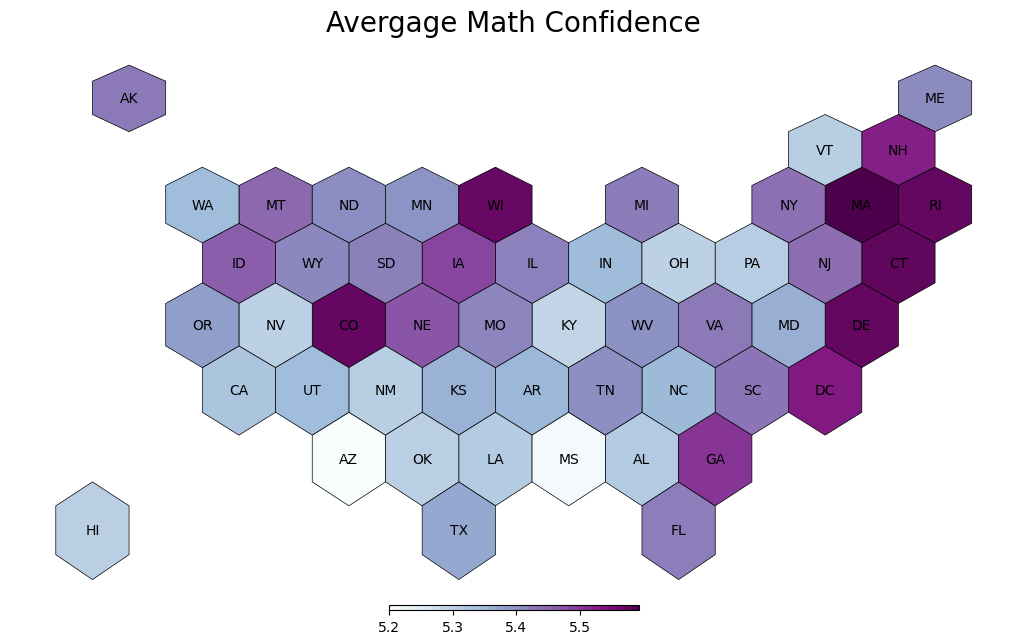

In [13]:
# Initialize the figure
fig, ax = plt.subplots(1, figsize=(13, 13))


# Draw a map with matplotlib 
geoData.plot(
    ax=ax, 
    column='math_conf_avg',
    cmap="BuPu",
    edgecolor='black', 
    linewidth=.5,
    legend=False
)
# add a "centroid" column with the centroid position of each state
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# for each state, annotate with the state name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    ax.annotate(
        text=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color= 'black'
    )
# Remove axis
ax.axis('off')

plt.title('Avergage Math Confidence' , size= 20)

# Add a color bar
norm = Normalize(vmin=geoData['math_conf_avg'].min(), vmax=geoData['math_conf_avg'].max())
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=norm)
sm.set_array([geoData['fin_conf_avg']]) 
fig.colorbar(sm, orientation="horizontal",  aspect=50,fraction=0.005, pad=0, ax = ax )

In [14]:
#Turn Education Column back into Numerical Scoring
#education level
num_ed_df = combined_df.copy()
ed_labels = ['did not complete HS', 'HS Grad', 'GED', 'some college', 'Associates', 'Bachelors', 'Post Grad', 'declined']
ed_vals = [1,2,3,4,5,6,7,99]
ed_dict = dict(zip(ed_labels, ed_vals))
num_ed_df['ed_lvl']= num_ed_df['ed_lvl'].replace(ed_dict)

num_ed_df.loc[num_ed_df['ed_lvl'] == 99, 'ed_lvl'] = None #drop declined answers
num_ed_df = num_ed_df.dropna()

ed_lvl_avg = num_ed_df[['state','ed_lvl']].groupby('state').mean().reset_index()
ed_lvl_avg = ed_lvl_avg.sort_values(by='state')
geoData['ed_lvl_avg'] = ed_lvl_avg['ed_lvl']

/var/folders/t6/vtfks7dd2t9gw7pq2601sfcw0000gn/T/ipykernel_80788/3794288920.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  num_ed_df['ed_lvl']= num_ed_df['ed_lvl'].replace(ed_dict)


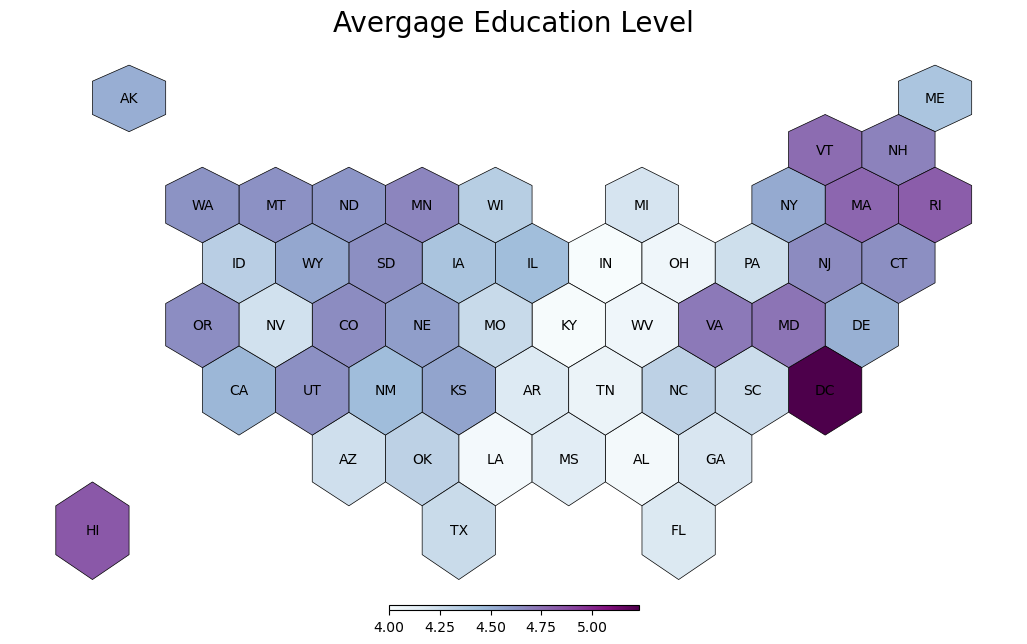

In [15]:
# Initialize the figure
fig, ax = plt.subplots(1, figsize=(13, 13))


# Draw a map with matplotlib 
geoData.plot(
    ax=ax, 
    column='ed_lvl_avg',
    cmap="BuPu",
    edgecolor='black', 
    linewidth=.5,
    legend=False
)
# add a "centroid" column with the centroid position of each state
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# for each state, annotate with the state name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    ax.annotate(
        text=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color= 'black'
    )
# Remove axis
ax.axis('off')

plt.title('Avergage Education Level' , size= 20)

# Add a color bar
norm = Normalize(vmin=geoData['ed_lvl_avg'].min(), vmax=geoData['ed_lvl_avg'].max())
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=norm)
sm.set_array([geoData['fin_conf_avg']]) 
fig.colorbar(sm, orientation="horizontal",  aspect=50,fraction=0.005, pad=0, ax = ax )

Text(0.5, 1.0, 'State Average Distribution')

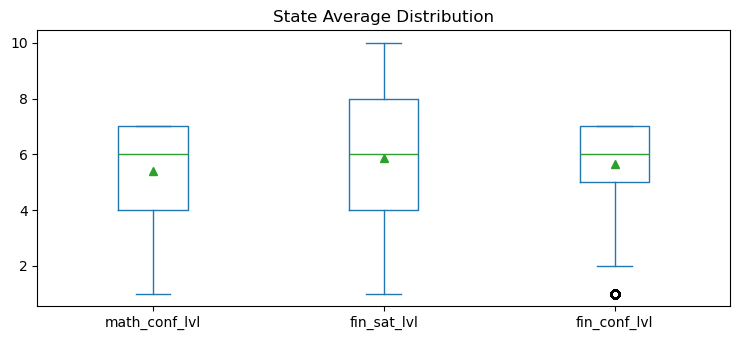

In [16]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
#Plot Graph
ax = combined_df[['math_conf_lvl','fin_sat_lvl', 'fin_conf_lvl']].plot(kind='box', showmeans=True)
ax.set_title('State Average Distribution')

## Any Correlations?

In [17]:
corr_df = pd.DataFrame(state_math_avg['math_conf_lvl'])
corr_df['ed_lvl'] = ed_lvl_avg['ed_lvl']
corr_df['fin_conf_lvl'] = fin_conf_avg['fin_conf_lvl']
corr_df.corr()

,math_conf_lvl,ed_lvl,fin_conf_lvl
math_conf_lvl,1.000000,0.446301,0.513621
ed_lvl,0.446301,1.000000,0.500477
fin_conf_lvl,0.513621,0.500477,1.000000


<Axes: xlabel='math_conf_lvl', ylabel='fin_conf_lvl'>

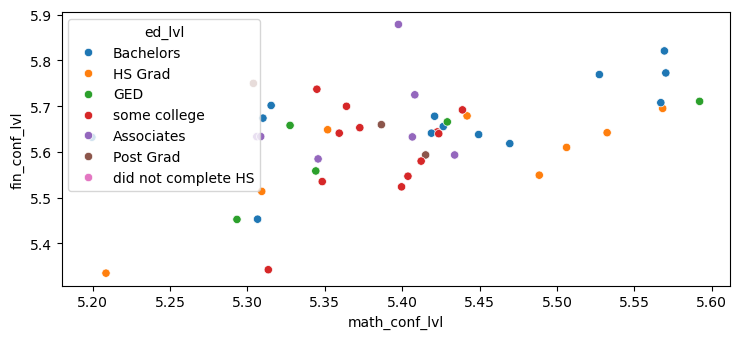

In [18]:
fig, ax = plt.subplots()

sns.scatterplot(data=corr_df, x="math_conf_lvl", y="fin_conf_lvl", hue= combined_df['ed_lvl'])
#sns.scatterplot(data=corr_df, x="math_conf_lvl", y="ed_lvl")

In [19]:
state_ed_lvl =combined_df[['state','ed_lvl']].groupby('state').value_counts().reset_index()



In [20]:
ed_lvl_pivot =state_ed_lvl.pivot(index='state', 
                    columns = 'ed_lvl', 
                    values = 'count')


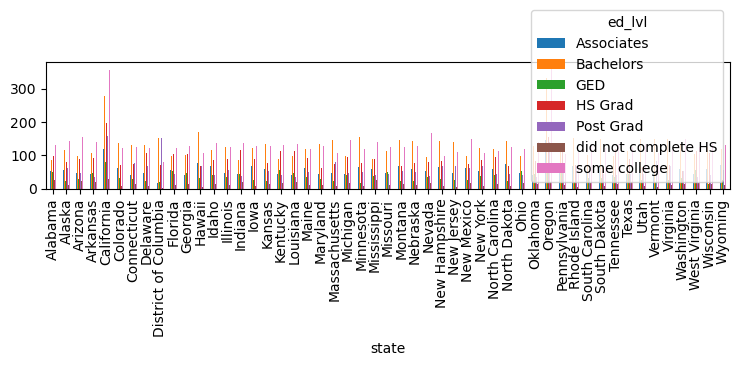

In [21]:
ed_lvl_pivot.plot(kind='bar')
plt.rcParams["figure.autolayout"] = True


In [22]:
ed_lvl_pivot.describe().T

,count,mean,std,min,25%,50%,75%,max
ed_lvl,,,,,,,,
Associates,51.0,56.549020,19.348709,16.0,45.5,53.0,63.5,146.0
Bachelors,51.0,129.117647,42.222576,85.0,101.0,122.0,143.5,332.0
GED,51.0,35.450980,13.666475,15.0,25.0,33.0,44.5,81.0
HS Grad,51.0,90.607843,24.088236,53.0,74.0,88.0,101.0,196.0
Post Grad,51.0,57.666667,26.653080,34.0,41.5,50.0,67.0,157.0
did not complete HS,51.0,13.254902,5.945900,3.0,9.0,13.0,17.0,29.0
some college,51.0,135.392157,47.917044,81.0,120.0,127.0,136.0,362.0


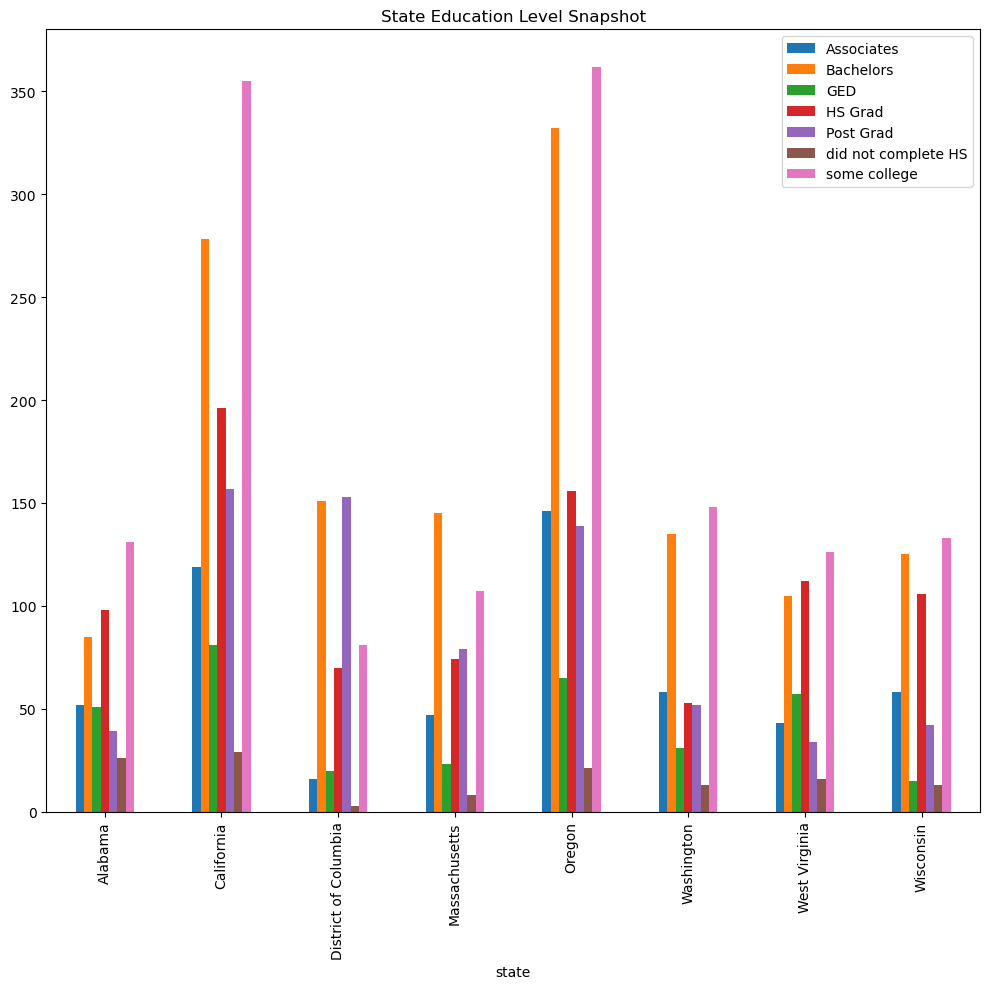

In [23]:
max_min_states = ed_lvl_pivot.loc[['Alabama', 'California', 'District of Columbia','Massachusetts', 'Oregon',
                                    'Washington','West Virginia', 'Wisconsin' ]]

# Creating Plot
max_min_states.plot(kind='bar', figsize= (10,10))

#Adding Details
plt.title('State Education Level Snapshot')
plt.legend(loc='upper right')